In [28]:
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


plot_3d_2c_fp (generic function with 1 method)

In [29]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")"""

"username = \"Alex\"\npathtorepo = \"C:\\Users\\\" *username *  \"\\Desktop\\\"\nusing Pkg\nPkg.activate(pathtorepo * \"dynamical-systems\\env\\integrate\\\")"

FOR MATCONT

E, x, u, y, ecm, p
tau, tauD, tauF, tauy, alpha, alphaE, alphaecm, alphap, J, U0, I0, deltaU0, beta, betaecm, betap, gammap, ecm0, ecm1, kecm, thetaecm, p0, p1, thetap, kp, ythr, xthr

g = log( 1 + exp( ( (J + alphaE * ecm) * u * x * E + I0) / alpha ) )
U = U0 + deltaU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
Hy = 1 / ( 1 + exp( -20 * ( x - xthr ) ) )
Hecm = ecm0 - (ecm0 - ecm1) / (1 + exp( -(E - thetaecm) / kecm ) )
Hp =  p0 - (p0 - p1) / (1 + exp( -(E - thetap) / kp) )

E' = (-E + alpha * g) / tau;
x' = (1 - x) / tauD  -u * x * E;
u' = (U - u) / tauF  + U * (1 - u) * E
y' = (-y) / tauy + beta * Hy
ecm' = -( alphaecm + gammap * p ) * ecm + betaecm * Hecm
p' = -alphap * p + betap * Hp

In [30]:
time = 3000.0; tt = 0.0; tstep = 0.001; ttr = 500.0; times = [time, tt];
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [31]:
# Эти начальные условия соответствуют одному и тому же аттрактору
u01 = [2.422092651924434, 0.8446031114662503, 0.6534291088738378, 0.09540062161211987, 0.0004056327238809937, 1.4805608752412292e-9];
u02 = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];

In [32]:
u01 = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];
u02 = zeros(6);
param = TM6_glial_ECM_get_params();

In [33]:
valuewithname, indexparams = TM6_glial_ECM_help(param);

In [34]:
ds1 = CoupledODEs(TM6_glial_ECM, u01, param, diffeq = integ_set);
tr1, trange1 = trajectory(ds1, time, Ttr = ttr, Δt = tstep);

ds2 = CoupledODEs(TM6_glial_ECM, u02, param, diffeq = integ_set);
tr2, trange2 = trajectory(ds2, time, Ttr = ttr,  Δt = tstep);

In [35]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(0.0, 1.0), interval(0.0, 1.0), interval(0.0, 1.0);
ecmr, pr = interval(0.0, 0.1), interval(0.0, 0.1);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds1, box, TM6_glial_ECM_jac, tol = 1e-10, method = IntervalRootFinding.Krawczyk); fp

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools /home/nova/.julia/packages/ChaosTools/Nr2Oq/src/stability/fixedpoints.jl:103


6-dimensional StateSpaceSet{Float64} with 3 points
 8.87461   0.48152   0.808868  0.000182715  2.47915e-13  1.77956e-23
 0.944945  0.924509  0.576087  0.488924     4.09301e-12  7.61928e-23
 2.98076   0.780101  0.630456  0.0656946    1.00733e-12  2.22857e-23

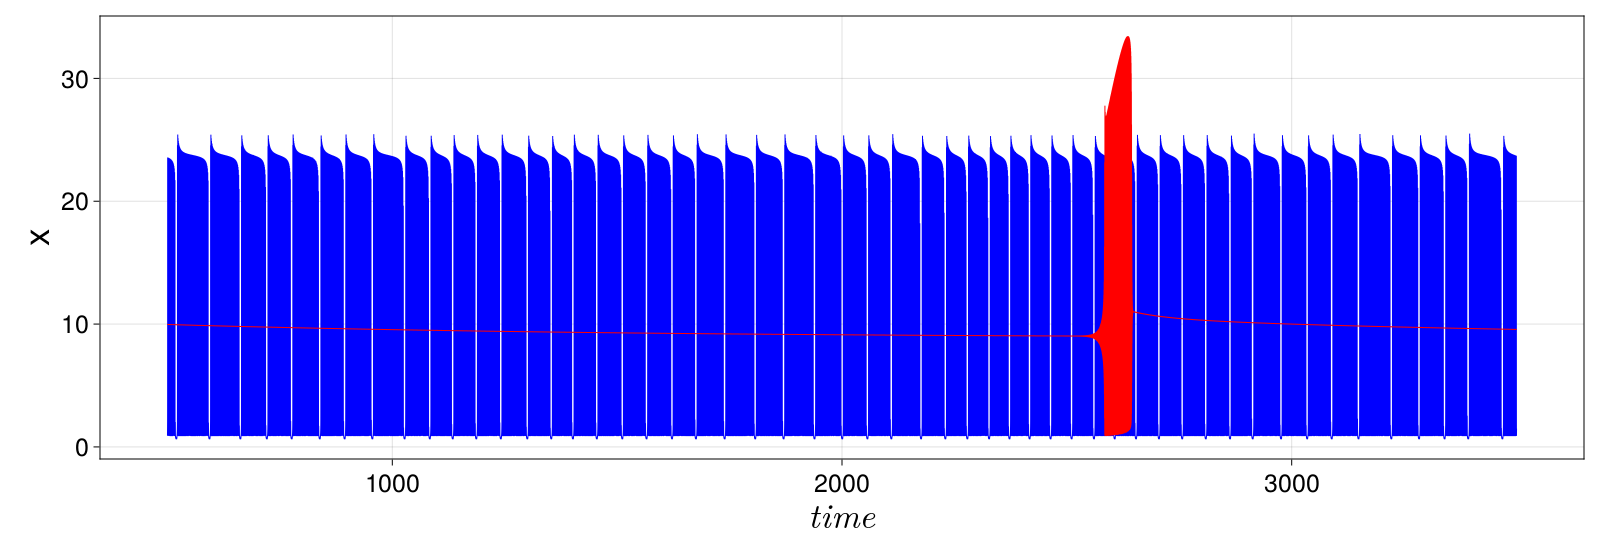

In [36]:
plot_timesereis_2c(trange1, trange2, tr1[:, 1], tr2[:, 1], 1, 3000000, width = 1600, height = 550, inter=false, lw = 1.0, color1 = :blue, color2 = :red);

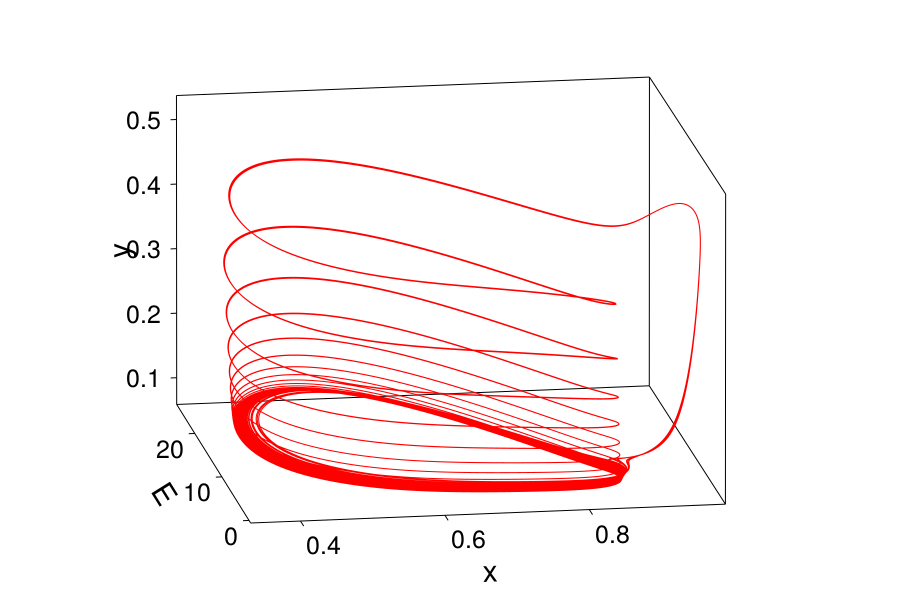

In [37]:
data1 = [tr1[:, 2], tr1[:, 1], tr1[:, 4]]
plot_3d(data1, 1, 500000; prot = 60, azim = -0.55pi, elev = 0.08pi, color = :red, xl = "x", yl = "E", zl = "y");

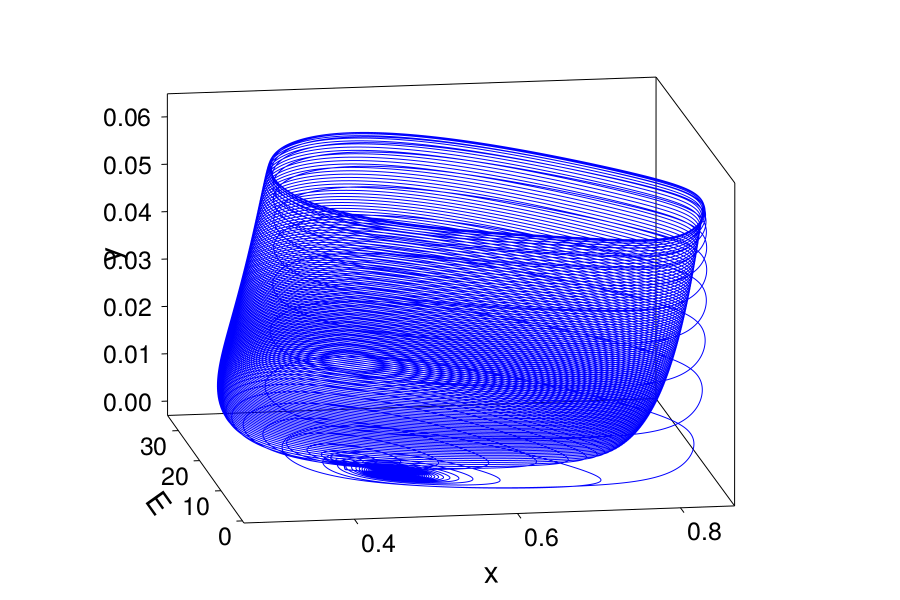

In [38]:
data2 = [tr2[:, 2], tr2[:, 1], tr2[:, 4]]
plot_3d(data2, 1, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi, color = :blue, xl = "x", yl = "E", zl = "y");

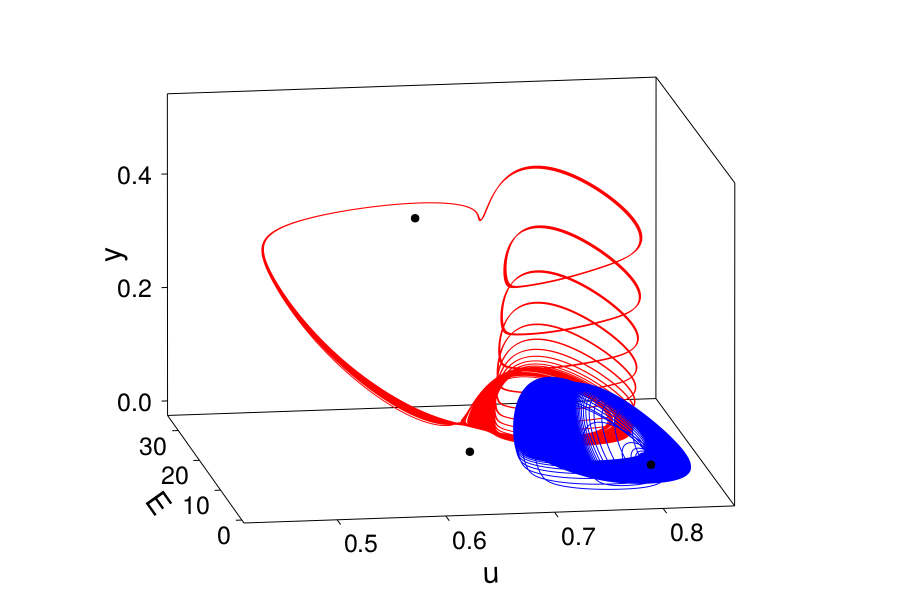

In [39]:
idx, idy, idz = 3, 1, 4
datamerg = [ tr1[:, idx], tr2[:, idx], tr1[:, idy], tr2[:, idy], tr1[:, idz], tr2[:, idz] ]
plot_3d_2c_fp(datamerg, [fp, idx, idy, idz], 1, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "u", yl = "E", zl = "y");